# Markowitz Shape Frontier
With the expected return and standard deviation of 2 stocks in a portfolio, as well as the correlation coefficient of the 2 stocks, calculate the expected return and standard deviation of the portfolio, with a bunch of different weight combination (ex. 100% stock A; 80% stock A +20% stock B; 60% stock A + 40% stock B, etc.). Draw the result on scatterplot, with the standard deviation of the portfolio on x-axis and rate of return of the portfolio on the y-axis. From the graph, you can find the portfolio with greater return but lower standard deviation.

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline facilitates plotting matplotlib graphs just below code cells and storing them in the notebook document

In [2]:
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()
for a in assets:
    pf_data[a] = wb.DataReader(a,data_source = 'yahoo',start='2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,PG,^GSPC
Date,,
2022-11-17,140.869995,3946.560059
2022-11-18,142.570007,3965.340088
2022-11-21,144.380005,3949.939941
2022-11-22,145.619995,4003.580078
2022-11-23,146.449997,4027.260010


<AxesSubplot:xlabel='Date'>

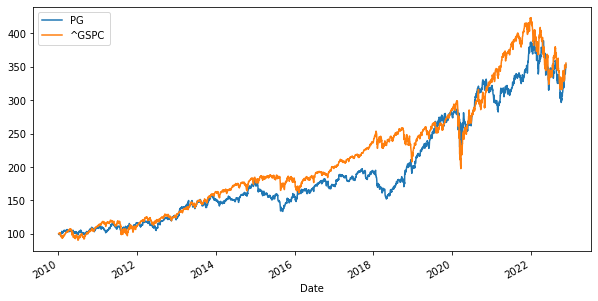

In [8]:
#normalizing to 100 and plot the graph
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))

In [9]:
#calculate the log returns
log_returns = np.log(pf_data/pf_data.shift(1))

In [6]:
log_returns.mean()*250

PG       0.097231
^GSPC    0.097676
dtype: float64

In [7]:
log_returns.cov()*250

,PG,^GSPC
PG,0.030093,0.017685
^GSPC,0.017685,0.031609


In [10]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.573423
^GSPC,0.573423,1.000000


In [17]:
'''create the variable contains the number of assets in the portfolio, so the function can change corresponding to
the change of the number of assets'''
num_assets = len(assets)
num_assets

2

In [18]:
#To get a random weight, use random function to generate 2 random number between 0 and 1
arr = np.random.random(2)
arr

array([0.71752091, 0.35992807])

In [19]:
arr[0] +arr[1]
# the sum doesn't add to 1, we need to find a way to let the 2 random weights sum to 1

1.0774489820704607

In [20]:
weights = np.random.random(num_assets)

'''/= is similar to +=, meaning weights = weights/sum(weights), this changes w1 = w1/(w1+w2), w2=w2/(w1+w2). 
Sum the new w1 and w2, it's (w1+w2)/(w1+w2) = 1. This changes the sum of weights into 1'''
weights/= np.sum(weights)
weights

array([0.97336906, 0.02663094])

In [21]:
weights[0]+weights[1]

1.0

In [22]:
#calculate the expected portfolio return
np.sum(weights*log_returns.mean())*250

0.09724275163340088

In [23]:
#calculate the expected portfolio variance
np.dot(weights.T,np.dot(log_returns.cov()*250,weights))

0.029451250220966865

In [24]:
#calculate expected portfolio volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

0.17161366560086894

In [26]:
#create a 1000 different weight portfolios using the previous 2 assets
pfolio_returns=[]
pfolio_volatilities =[]

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights))))

pfolio_returns =np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_returns, pfolio_volatilities

(array([0.09754051, 0.0976406 , 0.0973344 , 0.09740875, 0.09725772,
        0.09751494, 0.09755994, 0.09723361, 0.09749493, 0.09760731,
        0.09742056, 0.09766569, 0.09754731, 0.09748948, 0.09756831,
        0.09748103, 0.09741861, 0.09745049, 0.09746944, 0.09757706,
        0.09731185, 0.09749981, 0.09724233, 0.09765193, 0.09736249,
        0.09743708, 0.09745012, 0.09738951, 0.09728435, 0.0975809 ,
        0.09745048, 0.09730849, 0.09747643, 0.0973539 , 0.09760162,
        0.0973216 , 0.09729131, 0.09738782, 0.09734867, 0.09747875,
        0.09748243, 0.09753665, 0.09755637, 0.09754144, 0.09744627,
        0.09757731, 0.09750774, 0.09765843, 0.09741038, 0.09735428,
        0.09733706, 0.09746737, 0.09740499, 0.09745532, 0.09744473,
        0.09759149, 0.09748312, 0.09762286, 0.0975455 , 0.0973043 ,
        0.09745607, 0.09738988, 0.09759429, 0.09763812, 0.09754952,
        0.09761595, 0.09735553, 0.09735719, 0.09760795, 0.09748059,
        0.09753532, 0.09730669, 0.0976119 , 0.09

In [27]:
portfolios = pd.DataFrame({'Return':pfolio_returns, 'Volatility':pfolio_volatilities})

In [28]:
portfolios.head()

,Return,Volatility
0,0.097541,0.159909
1,0.097641,0.171923
2,0.097334,0.160459
3,0.097409,0.156147
4,0.097258,0.169393


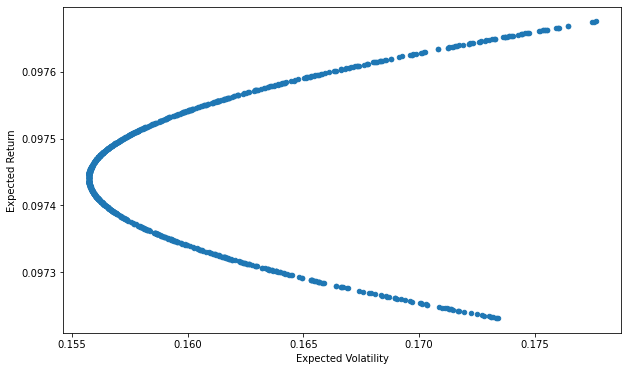

In [30]:
#Plot the Markwitz portfolio frontier graph
portfolios.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()